In [242]:
import glob
import os
import pickle
import sys
from pathlib import Path
import random
from tqdm import tqdm

import torchvision.models as models
from torch.nn import Module, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
import torchvision

#from pytorchtools import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from torchvision import datasets, models, transforms
import time
import logging

from PIL import Image

#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import KFold
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV



In [245]:
# load the pre-train model - VGG_19_Regression()
Model=torch.load('model_weights.pt')
#Model.load_state_dict(torch.load('model_weights.pt'))

Aggregation Patient level

In [16]:
# create the folder to save the predictions
dir_0 = os.path.join("Predict_trainsetCV_fold_0")
dir_1 = os.path.join("Predict_trainsetCV_fold_1")
dir_2 = os.path.join("Predict_trainsetCV_fold_2")
dir_3 = os.path.join("Predict_trainsetCV_fold_3")
dir_4 = os.path.join("Predict_trainsetCV_fold_4")
os.mkdir(dir_0)
os.mkdir(dir_1)
os.mkdir(dir_2)
os.mkdir(dir_3)
os.mkdir(dir_4)

In [54]:
def prediction(path,Patient_ID,Predict_folder):

    predict=[]
    
    images= os.listdir('/Users/eudari01/GNNs_Vs_CNNs/'+path) 

    for eachtiles in images:
        
        Model.eval()
        
        img = Image.open('/Users/eudari01/GNNs_Vs_CNNs/'+path+ eachtiles)
       
        #convert the image to a tensor
        convert_tensor = transforms.ToTensor()
        image = convert_tensor(img)
        # the model, prediction
        outputs=Model(image[None, ...].float())
        
        predicted = outputs.data.numpy()
        predict.append(predicted) 
        
        # save the file into a text file 
        x = np.array(predict)
        y=list(x.flatten())
        np.savetxt('/Users/eudari01/GNNs_Vs_CNNs/'+ Predict_folder + Patient_ID + '.txt', y,delimiter=',')
        #df = pd.read_csv (Patient_ID +'.txt')
        #df = pd.DataFrame(df, columns = [Patient_ID ])
        
        #df.to_csv(Patient_ID +'.csv')

     
    return
        
        
        

In [55]:
# the path = the path with all the patients ID

In [248]:
#get the prediction for one split and all the tiles 
def AllIDprediction_0(path):
    
    # path  through the ID 
    allID= os.listdir(path)
    for ID in allID :

        prediction('/tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_0/'+ ID+'/train_metastasis/',ID, '/Predict_trainsetCV_fold_0/')

In [249]:
#get the prediction for one split and all the tiles 
def AllIDprediction_1(path):
    
    # path  through the ID 
    allID= os.listdir(path)
    for ID in allID :

        prediction('/tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_1/'+ ID+'/train_metastasis/',ID, '/Predict_trainsetCV_fold_1/')

In [250]:
#get the prediction for one split and all the tiles 
def AllIDprediction_2(path):
    
    # path  through the ID 
    allID= os.listdir(path)
    for ID in allID :

        prediction('/tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_2/'+ ID+'/train_metastasis/',ID, '/Predict_trainsetCV_fold_2/')

In [259]:
#get the prediction for one split and all the tiles 
def AllIDprediction_3(path):
    
    # path  through the ID 
    allID= os.listdir(path)
    for ID in allID :

        prediction('/tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_3/'+ ID+'/train_metastasis/',ID, '/Predict_trainsetCV_fold_3/')

In [260]:
#get the prediction for one split and all the tiles 
def AllIDprediction_4(path):
    
    # path  through the ID 
    allID= os.listdir(path)
    for ID in allID :

        prediction('/tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_4/'+ ID+'/train_metastasis/',ID, '/Predict_trainsetCV_fold_4/')

In [251]:
AllIDprediction('tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_0/')

In [253]:
AllIDprediction_1('tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_1/')

In [262]:
AllIDprediction_2('tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_2/')

In [263]:
AllIDprediction_3('tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_3/')

In [264]:
AllIDprediction_4('tiles_CIN/train/tiles_has_CIN_HE_trainsetCV_fold_4/')

Im this part we will use the previous txt file to calculate manualy the MSE 

In [278]:
def MSE(path_prediction_files, real_labels_path,CIN_log_columns):
   
    # txt files with all the predictions for each patient
    txt_files= os.listdir(path_prediction_files)
    df = pd.DataFrame()

    for eachfile in txt_files:
        
        frame = pd.read_csv(path_prediction_files+ eachfile,header=None)
        # get the mean for each 
        t=frame.mean().reset_index()
        df = df.append(t)
        # predictions for each patients 
        y_pred=df.reset_index(drop=True)
        y_pred= y_pred.drop(columns=['index'])
        # load the reals labels
        y_true= pd.read_csv(real_labels_path,sep=',', engine='python',encoding='utf8')
        
        # select the colums reagrding the split
        y_true[CIN_log_columns]
        
        #calculate the MSE for each patient 
        MSE = np.mean((y_true[CIN_log_columns]- y_pred)**2, axis=1)
        
        #calcuate the global MSE
        
        #Global_MSE= np.mean (MSE)
        
        
    return  MSE

In [279]:
x=MSE('/Users/eudari01/GNNs_Vs_CNNs/Predict_trainsetCV_fold_2/', '/Users/eudari01/GNNs_Vs_CNNs/CIN_log.csv' ,'CIN_log_train_2')

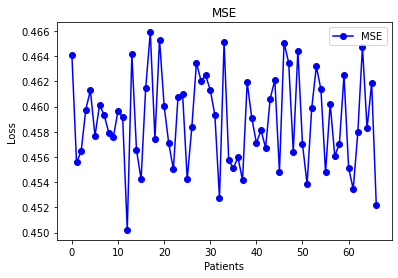

In [270]:
plt.title("MSE")
plt.plot(MSE('/Users/eudari01/GNNs_Vs_CNNs/Predict_trainsetCV_fold_2/', '/Users/eudari01/GNNs_Vs_CNNs/CIN_log.csv' ,'CIN_log_train_2'), 'bo-',label="MSE")
plt.xlabel("Patients")
plt.ylabel("Loss")
plt.legend()
plt.savefig
plt.show()

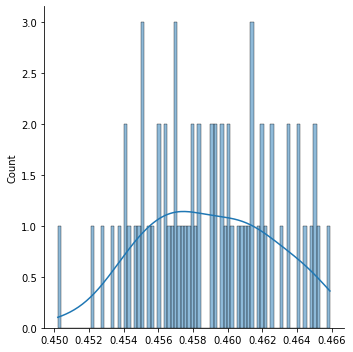

In [274]:
import seaborn as sns
plot=sns.displot(x, bins=82, kde=True)
plot.savefig("output.png")

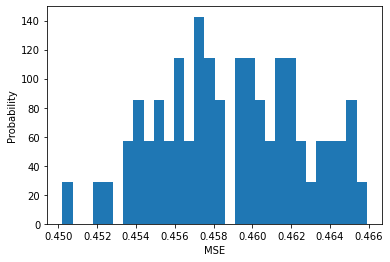

In [272]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('MSE')
